In [3]:
## pandasを使って収集したデータについて軽く調べてみます。
import pandas as pd
import numpy as np
import re
from matplotlib import pyplot as plt

data = pd.read_csv( 'player_world_stats.csv' ,index_col=0)
data = data.drop_duplicates(subset='name')

print(data.columns)
data = data[['name', 'Born','Span','Position','Mat','Start','Sub','Pts','Tries','Conv','Pens','Drop','%','Height','Weight']]

temp_span_year = []
temp_span_start = []
for span in data.Span:
    texts = span.split("-")
    temp_span_year.append(int(texts[1]) - int(texts[0]) + 1)
    temp_span_start.append(int(texts[0]))

data["Span"] = temp_span_year
data["SpanStart"] = temp_span_start

temp_born = []
for born in data.Born:
    result = re.search('1\d{3}', str(born))
    if result is not None:
        temp_born.append(int(result.group()))
    else:
        temp_born.append(0)

data["BornYear"] = temp_born

temp_weight = []
for weight in data.Weight:
    result = str(weight).replace(' lb','')
    temp_weight.append(0.45359237 * float(result))

data["Weight"] = temp_weight

temp_height = []

for height in data.Height:
    texts = str(height).split(" ")
    height_data = 0
    if len(texts) >= 3:        
        height_data = (float(texts[0]) * 12 + float(texts[2])) * 2.54

    temp_height.append(height_data)

data["Height"] = temp_height

data["BMI"] = data["Weight"] / ((data["Height"] / 100) ** 2)
data["NewBMI"] = 1.3 * data["Weight"] / ((data["Height"] / 100) ** 2.5)
data["diffBMI"] = data["NewBMI"] - data["BMI"]


data.head()
data.describe()

Index(['name', 'Full name', 'Born', 'Major teams', 'Position', 'Span', 'Mat',
       'Start', 'Sub', 'Pts', 'Tries', 'Conv', 'Pens', 'Drop', 'GfM', 'Won',
       'Lost', 'Draw', '%', 'Died', 'Height', 'Weight', 'Current age', 'Other',
       'Relations', 'Nickname', 'Also known as', 'Goals', 'Links'],
      dtype='object')


,Span,Mat,Start,Sub,Pts,Tries,Conv,Pens,Drop,%,Height,Weight,SpanStart,BornYear,BMI,NewBMI,diffBMI
count,15084.000000,15084.000000,15084.000000,15084.000000,14512.000000,15084.000000,15084.000000,15084.000000,15084.000000,15084.000000,15084.000000,6120.000000,15084.000000,15084.000000,6114.000000,6114.000000,6107.000000
mean,3.623243,10.618868,8.858592,1.760276,11.961756,1.424490,0.924954,1.021811,0.100570,47.855709,74.612584,97.829943,1967.368271,1589.387894,inf,inf,-1.202351
std,3.277361,15.935014,13.689546,4.279494,49.394087,3.631824,7.315015,8.875523,0.820591,32.683397,90.578878,14.600169,39.122647,751.603232,NaN,NaN,0.601525
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1871.000000,0.000000,13.992614,13.007086,-3.069135
25%,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.000000,87.089735,1936.000000,1876.000000,26.448563,25.419176,-1.612686
50%,2.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,97.975952,1977.000000,1939.000000,28.312463,26.987578,-1.191346
75%,5.000000,12.000000,10.000000,1.000000,8.000000,1.000000,0.000000,0.000000,0.000000,70.000000,182.880000,108.862169,2000.000000,1975.000000,30.562004,29.203949,-0.805466
max,21.000000,148.000000,141.000000,55.000000,1598.000000,69.000000,293.000000,281.000000,36.000000,100.000000,213.360000,179.622579,2018.000000,1999.000000,inf,inf,1.568335


In [4]:
data = data.query('Weight > 0')
data = data.query('Height > 0')
data = data.dropna(subset=['Position'])

new_data = pd.DataFrame()

for index, row in data.iterrows():        
    values = []
    for column in data.columns:
        values.append(row[column])
    
    series = pd.Series(values, index=data.columns)
    for position in str(row['Position']).split(','):
        copy_series = series.copy()
        copy_series['Position'] = str.strip(position)
        new_data = new_data.append(copy_series, ignore_index = True)

new_data = new_data[['name', 'Born','Span','Position','Mat','Start','Sub','Pts','Tries','Conv','Pens','Drop','%','Height','Weight','BMI','NewBMI','diffBMI']]
new_data.describe()

,Span,Mat,Start,Sub,Pts,Tries,Conv,Pens,Drop,%,Height,Weight,BMI,NewBMI,diffBMI
count,6742.000000,6742.000000,6742.000000,6742.000000,6729.000000,6742.000000,6742.000000,6742.000000,6742.000000,6742.000000,6742.000000,6742.000000,6742.000000,6742.000000,6742.000000
mean,4.517651,17.353753,13.434589,3.919163,22.672462,2.548354,1.880451,2.050578,0.148176,52.563656,184.059205,97.358469,28.657132,27.471335,-1.185797
std,3.637795,21.291470,18.395774,5.851433,72.737227,5.148352,11.180026,13.412071,1.069945,29.061291,7.921979,14.251213,3.270116,3.141629,0.604276
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,154.940000,53.523900,13.992614,13.007086,-3.069135
25%,1.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.330000,177.800000,86.636143,26.310860,25.292706,-1.598157
50%,3.000000,9.000000,6.000000,2.000000,5.000000,1.000000,0.000000,0.000000,0.000000,50.000000,182.880000,97.522360,28.196742,26.857203,-1.175601
75%,7.000000,24.000000,18.000000,5.000000,16.000000,3.000000,0.000000,0.000000,0.000000,70.562500,187.960000,107.954984,30.409584,29.028018,-0.788751
max,18.000000,148.000000,141.000000,55.000000,1598.000000,69.000000,293.000000,281.000000,36.000000,100.000000,213.360000,151.499852,44.351543,42.934464,1.568335


In [4]:
grouped = new_data.groupby('Position')
grouped.describe()

%                                                         \
              count       mean        std    min      25%     50%      75%   
Position                                                                     
Back-row      438.0  53.050183  27.516324   0.00  35.7100  50.695  66.6600   
Centre        897.0  52.190468  29.502502   0.00  33.3300  50.000  71.4200   
Five-eighth     8.0  83.778750  14.009022  60.00  75.0000  84.285  93.7450   
Flanker       578.0  52.784291  30.779818   0.00  33.3300  50.835  73.4725   
Fly-half      467.0  53.501328  29.252549   0.00  35.2900  52.940  71.4200   
Forward         1.0  64.280000        NaN  64.28  64.2800  64.280  64.2800   
Front-row       1.0  42.850000        NaN  42.85  42.8500  42.850  42.8500   
Fullback      431.0  53.685406  27.729547   0.00  36.9300  50.000  69.3350   
Halfback       11.0  31.736364  27.441974   0.00   7.1400  30.000  54.1650   
Hooker        480.0  54.673187  27.918346   0.00  38.3825  51.830  71.1875   
Lock          826.0  50.758511  28.993126   0.00  33.3300  50.000  68.7500   
No. 8         261.0  52.215517  27.919480   0.00  37.5000  52.940  68.1800   
Outside back    7.0  51.085714  31.553150   0.00  37.5000  60.000  61.3000   
Prop          986.0  52.120497  28.830359   0.00  33.3300  50.000  70.0000   
Scrum-half    464.0  53.039806  30.094628   0.00  33.3300  53.740  74.0100   
Utility back   50.0  54.815400  30.825988   0.00  33.5500  55.840  71.3525   
Wing          836.0  52.244581  29.320492   0.00  33.3300  50.000  71.4200   

                        BMI               ...         Weight              \
                 max  count       mean    ...            75%         max   
Position                                  ...                              
Back-row      100.00  438.0  29.157753    ...     109.769354  134.716934   
Centre        100.00  897.0  27.570152    ...      97.975952  122.923532   
Five-eighth   100.00    8.0  27.118953    ...      94.574009  103.872653   
Flanker       100.00  578.0  28.072863    ...     104.779837  124.737902   
Fly-half      100.00  467.0  26.364397    ...      89.811289  111.583723   
Forward        64.28    1.0  26.022925    ...     104.779837  104.779837   
Front-row      42.85    1.0  32.783333    ...     100.697506  100.697506   
Fullback      100.00  431.0  26.168992    ...      92.532843  107.954984   
Halfback       75.00   11.0  25.825551    ...      81.873423   89.811289   
Hooker        100.00  480.0  31.255956    ...     107.954984  126.552271   
Lock          100.00  826.0  28.654301    ...     115.666054  149.685482   
No. 8         100.00  261.0  29.006371    ...     110.676538  129.727418   
Outside back  100.00    7.0  28.038054    ...     104.779837  109.769354   
Prop          100.00  986.0  33.378620    ...     118.841201  151.499852   
Scrum-half    100.00  464.0  26.432310    ...      86.636143  111.583723   
Utility back  100.00   50.0  26.923656    ...      93.893621  105.687022   
Wing          100.00  836.0  26.755460    ...      94.800805  136.531303   

             diffBMI                                                    \
               count      mean       std       min       25%       50%   
Position                                                                 
Back-row       438.0 -1.629092  0.368780 -2.480526 -1.879488 -1.692067   
Centre         897.0 -0.987850  0.447318 -2.122256 -1.291052 -1.039147   
Five-eighth      8.0 -1.020328  0.271606 -1.475781 -1.134136 -0.961584   
Flanker        578.0 -1.380694  0.480248 -2.509526 -1.722864 -1.445606   
Fly-half       467.0 -0.718908  0.437004 -1.787030 -1.028651 -0.744337   
Forward          1.0 -2.141015       NaN -2.141015 -2.141015 -2.141015   
Front-row        1.0 -0.590807       NaN -0.590807 -0.590807 -0.590807   
Fullback       431.0 -0.924517  0.458059 -2.013235 -1.222315 -0.991913   
Halfback        11.0 -0.200463  0.426657 -0.658037 -0.477702 -0.420484   
Hooker         480.0 -0.965855  0.383084 -1.8669

In [21]:
temp = new_data
temp = temp.sort_values('Mat', ascending=False)
temp.head(20)

,name,Born,Span,Position,Mat,Start,Sub,Pts,Tries,Conv,Pens,Drop,%,Height,Weight,BMI,NewBMI,diffBMI
3544,Richie McCaw,"December 31, 1980, Oamaru",15.0,Flanker,148.0,141.0,7.0,135.0,27.0,0.0,0.0,0.0,89.18,187.96,107.954984,30.557078,28.974934,-1.582144
2555,Brian O'Driscoll,"January 21, 1979, Dublin",16.0,Centre,141.0,140.0,1.0,250.0,47.0,0.0,0.0,5.0,58.86,177.80,92.986436,29.414135,28.676990,-0.737146
380,George Gregan,"April 19, 1973, Lusaka",14.0,Scrum-half,139.0,133.0,6.0,99.0,18.0,0.0,0.0,3.0,67.62,172.72,75.749926,25.392003,25.117071,-0.274932
2888,Sergio Parisse,"September 12, 1983, La Plata",17.0,No. 8,134.0,131.0,3.0,78.0,15.0,0.0,0.0,1.0,25.00,195.58,121.562755,31.779836,29.541516,-2.238320
4551,Gethin Jenkins,"November 17, 1980, Llantwit Fadre",15.0,Prop,134.0,98.0,36.0,20.0,4.0,0.0,0.0,0.0,46.64,187.96,121.562755,34.408811,32.627237,-1.781574
3563,Keven Mealamu,"March 20, 1979, Tokoroa",14.0,Hooker,132.0,77.0,55.0,60.0,12.0,0.0,0.0,0.0,87.12,180.34,109.769354,33.751803,32.673397,-1.078405
2566,Ronan O'Gara,"March 7, 1977, San Diego, CA, United States",14.0,Fly-half,130.0,87.0,43.0,1083.0,16.0,176.0,202.0,15.0,57.30,182.88,84.368181,25.225876,24.249707,-0.976169
466,Stephen Moore,"January 20, 1983, Khamis Mushait, Saudi Arab",13.0,Hooker,129.0,97.0,32.0,40.0,8.0,0.0,0.0,0.0,57.36,185.42,111.583723,32.455454,30.985090,-1.470365
4591,Alun Wyn Jones,"September 19, 1985, Swansea",13.0,Lock,128.0,116.0,12.0,45.0,9.0,0.0,0.0,0.0,48.43,195.58,117.934016,30.831184,28.659680,-2.171504
4198,Victor Matfield,"May 11, 1977, Pietersburg",15.0,Lock,127.0,121.0,6.0,35.0,7.0,0.0,0.0,0.0,62.99,200.66,109.769354,27.262112,25.019144,-2.242968


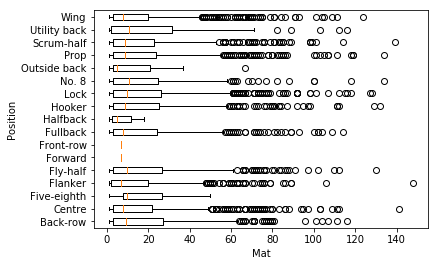

In [7]:
Y = []
labels = []
for group in grouped:
    labels.append(group[0])
    Y.append(group[1]['Mat'])
    
fig,ax = plt.subplots()
ax.boxplot(Y,labels=labels,vert=False)
plt.xlabel('Mat')
plt.ylabel('Position')
plt.show()

In [12]:
temp = data.query("Mat > 40")
print(len(temp))

772


In [13]:
print(len(temp) / len(data))

0.12655737704918033


In [14]:
temp = data.query("Mat > 60")
print(len(temp))

373


(array([3941.,  996.,  522.,  253.,  196.,  112.,   39.,   28.,    8.,
           5.]),
 array([  1. ,  15.7,  30.4,  45.1,  59.8,  74.5,  89.2, 103.9, 118.6,
        133.3, 148. ]),
 <a list of 10 Patch objects>)

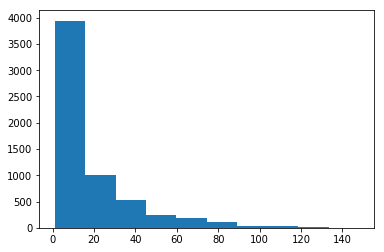

In [18]:
matches = data['Mat']
plt.hist(matches)

(array([255., 169., 146.,  88.,  45.,  32.,  19.,   8.,   7.,   3.]),
 array([ 41. ,  51.7,  62.4,  73.1,  83.8,  94.5, 105.2, 115.9, 126.6,
        137.3, 148. ]),
 <a list of 10 Patch objects>)

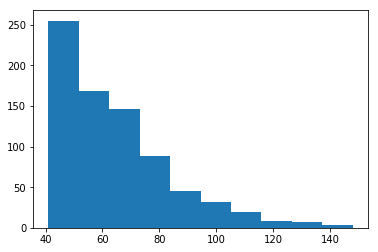

In [19]:
temp = data.query("Mat > 40")
matches = temp['Mat']
plt.hist(matches)

In [22]:
print(len(data))

6100


In [8]:
temp = new_data.query("Mat > 40")
long_grouped = temp.groupby('Position')
long_grouped.describe()

%                                                         \
              count       mean        std    min      25%     50%      75%   
Position                                                                     
Back-row       76.0  54.413421  14.392646  24.39  43.8150  54.150  62.9375   
Centre         83.0  56.733494  16.199791  15.90  46.6900  57.290  66.1450   
Five-eighth     1.0  75.000000        NaN  75.00  75.0000  75.000  75.0000   
Flanker        61.0  58.509344  15.904610  24.46  50.5600  59.800  69.0400   
Fly-half       59.0  57.132203  15.830373  19.51  47.8950  54.870  68.1550   
Fullback       53.0  55.224528  13.082862  20.22  46.0900  56.360  65.4900   
Hooker         68.0  54.741176  15.928576  20.61  42.6525  57.335  65.4200   
Lock          121.0  55.374793  14.870811  25.37  43.7500  55.950  64.2800   
No. 8          36.0  60.267500  10.868088  25.00  53.8550  62.735  68.2400   
Outside back    1.0  60.440000        NaN  60.44  60.4400  60.440  60.4400   
Prop          122.0  56.828770  15.773677  24.13  46.0525  58.400  66.4125   
Scrum-half     68.0  55.168235  15.715844  27.88  43.3375  53.740  65.5275   
Utility back   10.0  56.476000  11.970359  25.28  57.1850  59.645  61.7550   
Wing           79.0  55.944304  15.631193  26.19  44.1050  55.400  65.7600   

                       BMI               ...         Weight              \
                max  count       mean    ...            75%         max   
Position                                 ...                              
Back-row      90.00   76.0  29.216371    ...     110.789936  122.469940   
Centre        92.15   83.0  28.077746    ...     100.697506  122.923532   
Five-eighth   75.00    1.0  28.409750    ...      89.811289   89.811289   
Flanker       89.53   61.0  28.587522    ...     107.954984  124.737902   
Fly-half      91.54   59.0  27.009885    ...      92.532843  104.779837   
Fullback      84.00   53.0  26.691335    ...      94.800805  104.779837   
Hooker        90.51   68.0  32.029365    ...     109.769354  121.562755   
Lock          93.83  121.0  29.123981    ...     118.387609  130.181010   
No. 8         79.31   36.0  29.794653    ...     114.418675  121.562755   
Outside back  60.44    1.0  28.622744    ...     103.872653  103.872653   
Prop          94.36  122.0  33.647591    ...     119.748386  129.727418   
Scrum-half    89.62   68.0  26.818890    ...      88.904105  104.779837   
Utility back  67.92   10.0  27.322846    ...      95.707990  102.511876   
Wing          92.42   79.0  27.210579    ...      97.975952  118.841201   

             diffBMI                                                    \
               count      mean       std       min       25%       50%   
Position                                                                 
Back-row        76.0 -1.727833  0.315986 -2.446874 -1.927181 -1.759996   
Centre          83.0 -1.188587  0.386306 -2.113041 -1.465810 -1.147602   
Five-eighth      1.0 -0.711975       NaN -0.711975 -0.711975 -0.711975   
Flanker         61.0 -1.591478  0.409668 -2.407901 -1.895151 -1.649007   
Fly-half        59.0 -0.913211  0.343152 -1.678065 -1.162544 -0.882332   
Fullback        53.0 -1.085008  0.432692 -1.777683 -1.314960 -1.102126   
Hooker          68.0 -1.130088  0.293977 -1.781574 -1.270069 -1.149360   
Lock           121.0 -2.207559  0.274416 -2.832206 -2.397007 -2.198665   
No. 8           36.0 -1.865122  0.269800 -2.363458 -2.036553 -1.899066   
Outside back     1.0 -1.663536       NaN -1.663536 -1.663536 -1.663536   
Prop           122.0 -1.427820  0.346955 -2.208399 -1.665336 -1.427656   
Scrum-half      68.0 -0.584043  0.443610 -1.809008 -0.903499 -0.649048   
Utility back    10.0 -1.002354  0.308771 -1.641743 -1.107374 -0.973545   
Wing            79.0 -1.103451  0.441271 -2.188208 -1.405981 -1.086381   

                                  
                   75%       max  
Position                          
Back-row     -1.533948 -0.986665  
Centre       -0.

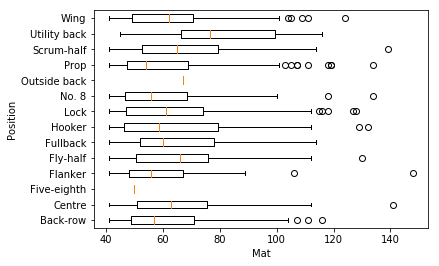

In [20]:

Y = []
labels = []
for group in long_grouped:
    labels.append(group[0])
    Y.append(group[1]['Mat'])
    
fig,ax = plt.subplots()
ax.boxplot(Y,labels=labels,vert=False)
plt.xlabel('Mat')
plt.ylabel('Position')
plt.show()